In [1]:
import pandas as pd
df = pd.read_csv('data/Data.csv')
df.head()

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_en    50000 non-null  object
 1   review_es    50000 non-null  object
 2   sentiment    50000 non-null  object
 3   sentimiento  50000 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB
None


C:\Users\JUAN\AppData\Local\Temp\ipykernel_11672\340336865.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimiento', data=df, palette={'positivo': 'green', 'negativo': 'red'}, legend=False, width=0.4)


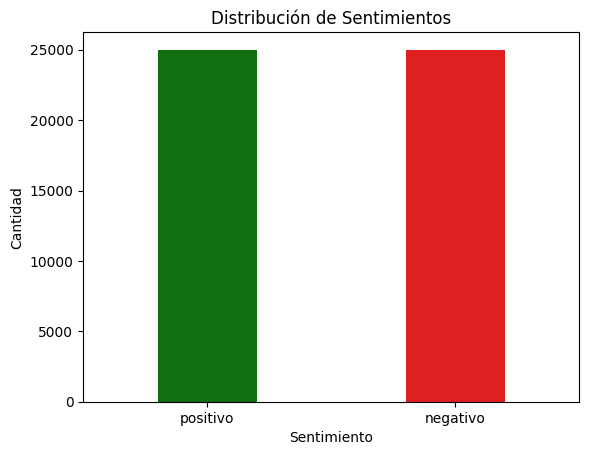

sentimiento
positivo    25000
negativo    25000
Name: count, dtype: int64

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())

sns.countplot(x='sentimiento', data=df, palette={'positivo': 'green', 'negativo': 'red'}, legend=False, width=0.4)

# Añadir etiquetas y título
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.title('Distribución de Sentimientos')

# Mostrar el gráfico
plt.show()
conteo_sentimientos = df['sentimiento'].value_counts()
conteo_sentimientos

## Preprocesado de texto

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Descargar solo la primera vez
# nltk.download('snowball_data')  
# nltk.download('stopwords')  

def preprocesar_texto(text):
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'[^ña-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words('spanish')) 
    stop_words.discard('no')
    words = [word for word in words if word not in stop_words]
    stemmer = SnowballStemmer('spanish') 
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)


def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|@\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words('english')) 
    stop_words.discard('not')
    stop_words.add('big')
    words = [word for word in words if word not in stop_words]
    stemmer = SnowballStemmer('english') 
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)




## Entrenamiento de modelo en ESPAÑOL

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/Data.csv')  
df =df[['review_es','sentimiento']] 
df['review_es'] = df['review_es'].apply(preprocesar_texto)
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=5000)
X = vectorizer.fit_transform(df['review_es'])
y = df['sentimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

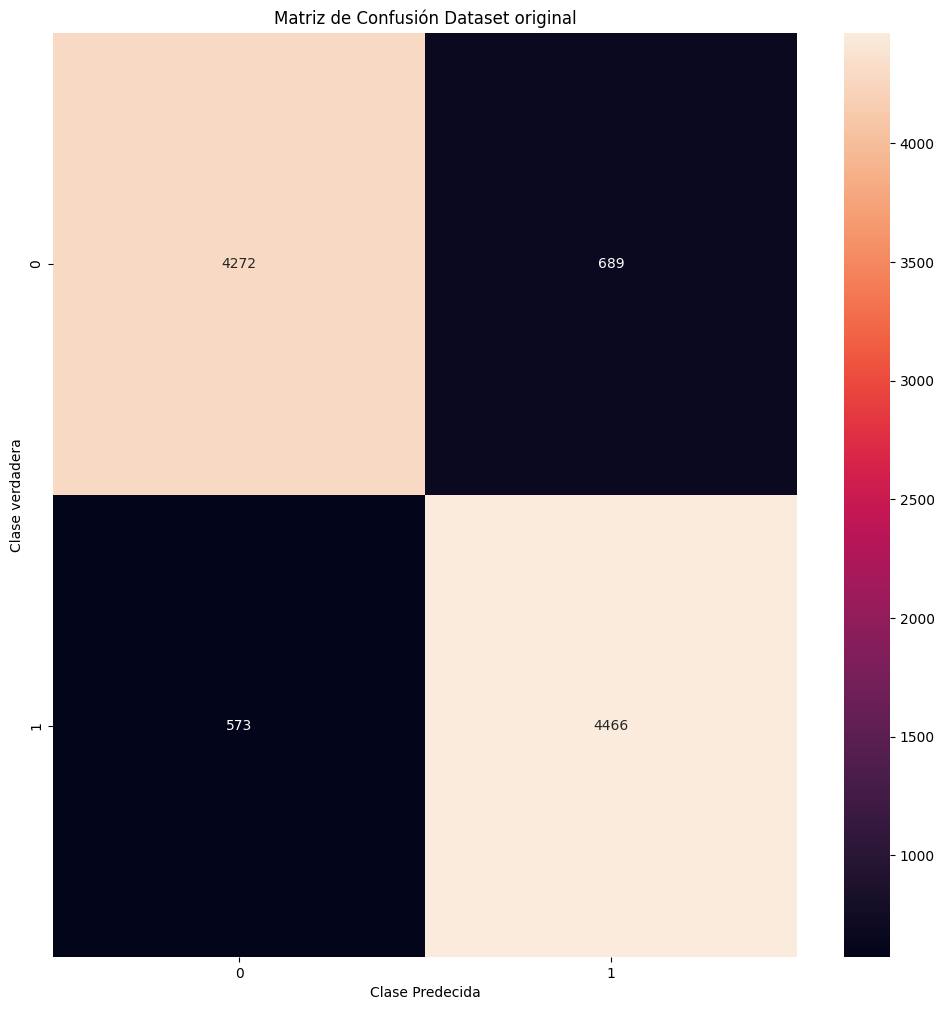

              precision    recall  f1-score   support

    negativo       0.88      0.86      0.87      4961
    positivo       0.87      0.89      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [5]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Matriz de Confusión Dataset original")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase Predecida')
plt.show()
print (classification_report(y_test, y_pred))


In [6]:
corte = 4
word_index_map = vectorizer.vocabulary_
print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)


Palabras más positivas:
encant 4.63287612088542
perfect 6.25029313036582
maravill 5.368833807521932
favorit 4.854318320090733
excelent 7.644083598371402
genial 4.136652184293917
definit 4.009202488935044


In [7]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
no -4.232091120303683
terribl -5.93653399569361
decepcion -4.093018371721086
mal -7.233046749188211
peor -9.600957184413588
horribl -7.530744232576292
coj -4.224666027468857
aburr -8.018445079238884
siqu -5.726854180721661
molest -4.263309424471501
minut -4.058957545245203
ridcul -4.847421483813812
desperdici -5.856268253239722
decepcin -4.546693540224298
peor pelcul -4.744078858030315
pobr -4.903499148890204
no val -4.277637771580089
carec -4.121298523284053


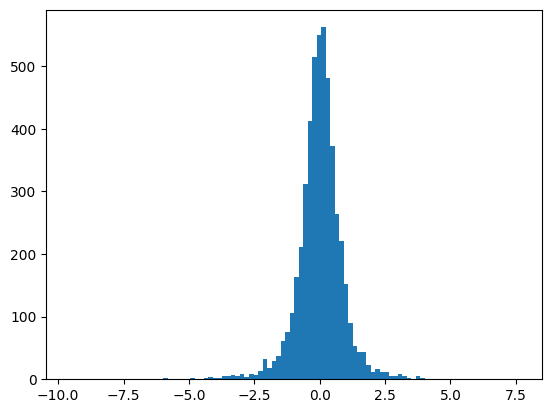

In [8]:
plt.hist(model.coef_[0], bins=100)
plt.show()

In [9]:
import pickle
# Guardar el modelo y el vectorizador
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [10]:

# Cargar el modelo y el vectorizador con pickle
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)


# Usar el modelo cargado para hacer predicciones
new_comment = ["es un buen produnto no dejaria de comprarlo"]
processed_comment = preprocesar_texto(new_comment[0])
vectorized_comment = loaded_vectorizer.transform([processed_comment])
prediction = loaded_model.predict(vectorized_comment)

print(processed_comment)

print(f"Prediction: {prediction}")

buen produnt no dejari compr
Prediction: ['positivo']


## Entrenamiento de modelo en ingles

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


df_en = pd.read_csv('data/Data.csv')
df_en =df_en[['review_en','sentimiento']]

df_en['review_en'] = df_en['review_en'].apply(preprocess_text)
vectorizer_en = TfidfVectorizer(ngram_range=(1, 2), max_features=6000)
X = vectorizer_en.fit_transform(df_en['review_en'])
y = df_en['sentimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_en = LogisticRegression(max_iter=1000)
model_en.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

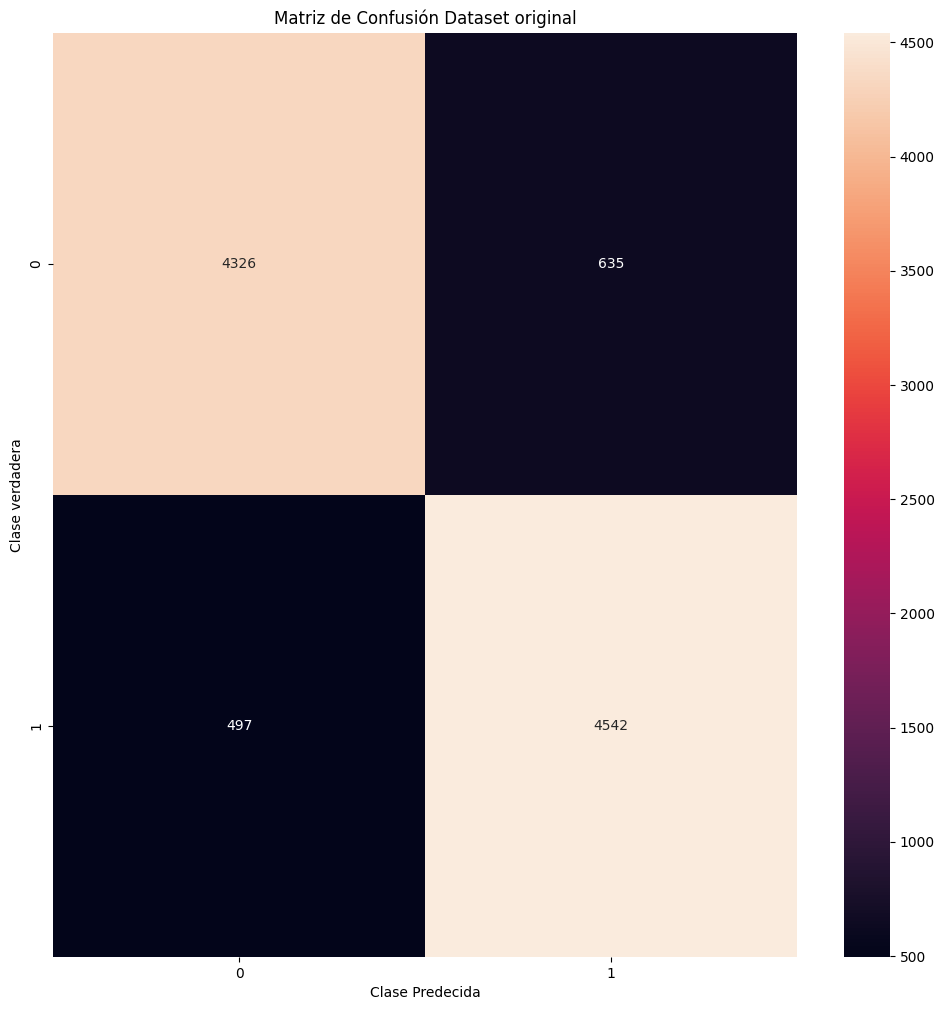

              precision    recall  f1-score   support

    negativo       0.90      0.87      0.88      4961
    positivo       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [12]:
y_pred = model_en.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Matriz de Confusión Dataset original")
plt.ylabel('Clase verdadera')
plt.xlabel('Clase Predecida')
plt.show()
print (classification_report(y_test, y_pred))

In [13]:
corte = 4
word_index_map = vectorizer_en.vocabulary_
print("Palabras más positivas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
front 4.854318320090733
extend 4.63287612088542
make sure 5.368833807521932
divid 4.009202488935044
gotten 4.136652184293917
flash 7.644083598371402
proceed 6.25029313036582


In [14]:
print("Palabras más negativas:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
idea -7.530744232576292
not know -4.277637771580089
titl -5.93653399569361
complaint -4.224666027468857
stupid -5.726854180721661
disgust -4.093018371721086
print -4.744078858030315
drive -5.856268253239722
ran -4.903499148890204
shout -4.847421483813812
nativ -4.232091120303683
accompani -8.018445079238884
principl -9.600957184413588
disguis -4.546693540224298
mislead -4.263309424471501
might not -4.058957545245203
lynch -7.233046749188211
charact like -4.121298523284053


In [15]:
new_comment = ["I don't like this thing is terrible"]
processed_comment = preprocess_text(new_comment[0])
vectorized_comment = vectorizer_en.transform([processed_comment])
prediction = model_en.predict(vectorized_comment)

print(processed_comment)

print(f"Prediction: {prediction}")

dont like thing terribl
Prediction: ['negativo']


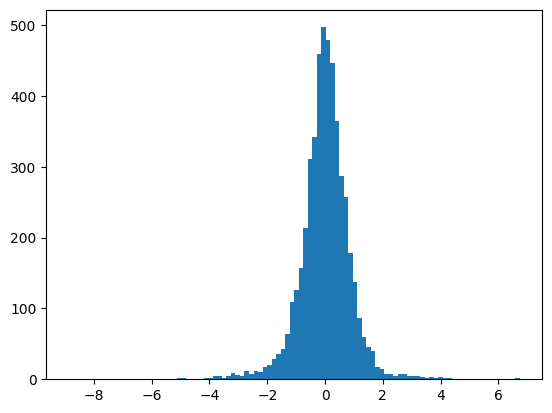

In [16]:
plt.hist(model_en.coef_[0], bins=100)
plt.show()

In [17]:
import pickle
# Guardar el modelo y el vectorizador
with open('model_en.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer_en.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [18]:

# Cargar el modelo y el vectorizador con pickle
with open('model_en.pkl', 'rb') as model_file:
    loaded_model_en = pickle.load(model_file)

with open('vectorizer_en.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer_en = pickle.load(vectorizer_file)


# Usar el modelo cargado para hacer predicciones
new_comment = ["I don't like this thing is terrible"]

for i in new_comment:
    processed_comment = preprocess_text(i)
    vectorized_comment = loaded_vectorizer_en.transform([processed_comment])
    prediction = loaded_model_en.predict(vectorized_comment)
    print(processed_comment)
    print(f"Prediction: {prediction}")

dont like thing terribl
Prediction: ['negativo']


In [ ]:
import pickle
# Cargar el modelo y el vectorizador ingles con pickle
with open('model_en.pkl', 'rb') as model_file:
    loaded_model_en = pickle.load(model_file)

with open('vectorizer_en.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer_en = pickle.load(vectorizer_file)

    
# Cargar el modelo y el vectorizador español con pickle
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    loaded_vectorizer = pickle.load(vectorizer_file)



In [3]:
import pandas as pd
nuevos_comentarios = pd.read_csv('data/comentarios.csv')
nuevos_comentarios.head()


,comentario_es,comentario_en
0,La suela se despegó después de solo una semana...,"Super comfortable, I can wear them all day wit..."
1,"El zapato es demasiado rígido, me lastima los ...",The quality of the material is excellent and g...
2,"Pedí mi talla habitual y me quedó enorme, la g...","They are light and flexible, perfect for long ..."
3,"Después de unos días de uso, el material comen...","The design is beautiful and great, they look e..."
4,"El zapato es incómodo, tiene una costura que r...","I was surprised how well they fit, as if they ..."


negativo    20
positivo    10
Name: count, dtype: int64
positivo    23
negativo     7
Name: count, dtype: int64


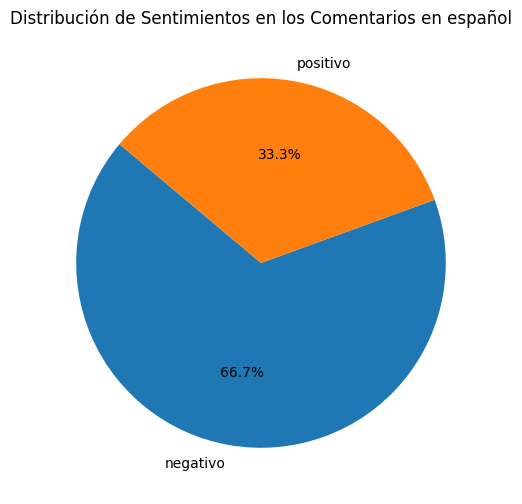

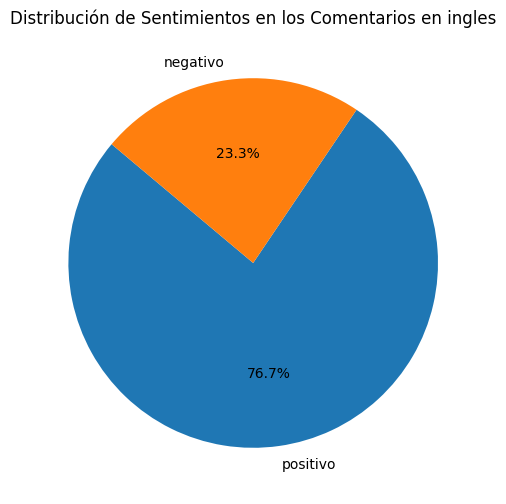

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

nuevos_comentarios = pd.read_csv('data/comentarios.csv')

print()

# Procesamos el texto de los comentarios.
nuevos_comentarios['comentario_es'] = nuevos_comentarios['comentario_es'].apply(preprocesar_texto)
nuevos_comentarios['comentario_en'] = nuevos_comentarios['comentario_en'].apply(preprocesar_texto)


# Se vectorizador 
X_nuevos_es = loaded_vectorizer.transform(nuevos_comentarios['comentario_es'])
X_nuevos_en = loaded_vectorizer_en.transform(nuevos_comentarios['comentario_en'])

# Predecir los sentimientos de los comentarios
predicciones_es = loaded_model.predict(X_nuevos_es)

predicciones_en = loaded_model_en.predict(X_nuevos_en)



# Contar el número de comentarios positivos y negativos
conteo_sentimientos_es = pd.Series(predicciones_es ).value_counts()
conteo_sentimientos_en = pd.Series(predicciones_en ).value_counts()
print(conteo_sentimientos_es)
print(conteo_sentimientos_en)
# Generar la gráfica de torta
plt.figure(figsize=(6, 6))
plt.pie(conteo_sentimientos_es, labels=conteo_sentimientos_es.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Sentimientos en los Comentarios en español')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(conteo_sentimientos_en, labels=conteo_sentimientos_en.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Sentimientos en los Comentarios en ingles')
plt.show()